In [1]:
import pandas as pd

In [3]:
df_business = pd.read_csv('/content/business.csv')
df_economy = pd.read_csv('/content/economy.csv')

In [4]:
df_business.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,Air India,AI,868,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,"25,612"
1,11-02-2022,Air India,AI,624,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,"25,612"
2,11-02-2022,Air India,AI,531,20:00,Delhi,24h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45,Mumbai,"42,220"
3,11-02-2022,Air India,AI,839,21:25,Delhi,26h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"44,450"
4,11-02-2022,Air India,AI,544,17:15,Delhi,06h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"46,690"


In [5]:
df_economy.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953"
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953"
2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956"
3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955"
4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955"


In [6]:
df_business['class'] = 'business'
df_economy['class'] = 'economy'

In [7]:
df = pd.concat([df_business, df_economy], ignore_index=True)
df.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class
0,11-02-2022,Air India,AI,868,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,"25,612",business
1,11-02-2022,Air India,AI,624,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,"25,612",business
2,11-02-2022,Air India,AI,531,20:00,Delhi,24h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45,Mumbai,"42,220",business
3,11-02-2022,Air India,AI,839,21:25,Delhi,26h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"44,450",business
4,11-02-2022,Air India,AI,544,17:15,Delhi,06h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"46,690",business


In [9]:
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class
0,21-03-2022,AirAsia,I5,2461,16:15,Bangalore,01h 10m,non-stop,17:25,Chennai,"1,603",economy
1,19-03-2022,Indigo,6E,6214,10:10,Kolkata,08h 25m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,18:35,Hyderabad,"6,970",economy
2,21-03-2022,Air India,AI,840,20:50,Hyderabad,25h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,22:20,Kolkata,"4,368",economy
3,22-02-2022,Vistara,UK,864,19:00,Bangalore,01h 45m,non-stop,20:45,Mumbai,"20,760",business
4,23-03-2022,AirAsia,I5,747,19:00,Delhi,06h 35m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,01:35,Kolkata,"2,480",economy


In [10]:
df.isna().sum()

,0
date,0
airline,0
ch_code,0
num_code,0
dep_time,0
from,0
time_taken,0
stop,0
arr_time,0
to,0


In [13]:
df['price'] = pd.to_numeric(df['price'].str.replace(',', ''), errors='coerce')

In [14]:
def fare_category(fare):
  if fare <= 4000:
    return 'Low'
  elif fare <= 10000:
    return 'Medium'
  else:
    return 'High'

df['fare_category'] = df['price'].apply(fare_category)
df.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class,fare_category
0,21-03-2022,AirAsia,I5,2461,16:15,Bangalore,01h 10m,non-stop,17:25,Chennai,1603,economy,Low
1,19-03-2022,Indigo,6E,6214,10:10,Kolkata,08h 25m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,18:35,Hyderabad,6970,economy,Medium
2,21-03-2022,Air India,AI,840,20:50,Hyderabad,25h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,22:20,Kolkata,4368,economy,Medium
3,22-02-2022,Vistara,UK,864,19:00,Bangalore,01h 45m,non-stop,20:45,Mumbai,20760,business,High
4,23-03-2022,AirAsia,I5,747,19:00,Delhi,06h 35m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,01:35,Kolkata,2480,economy,Low


In [15]:
df['journey_day'] = pd.to_datetime(df['date']).dt.day
df['journey_month'] = pd.to_datetime(df['date']).dt.month
df.head()

<ipython-input-15-142686925>:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['journey_day'] = pd.to_datetime(df['date']).dt.day
<ipython-input-15-142686925>:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['journey_month'] = pd.to_datetime(df['date']).dt.month


,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class,fare_category,journey_day,journey_month
0,21-03-2022,AirAsia,I5,2461,16:15,Bangalore,01h 10m,non-stop,17:25,Chennai,1603,economy,Low,21,3
1,19-03-2022,Indigo,6E,6214,10:10,Kolkata,08h 25m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,18:35,Hyderabad,6970,economy,Medium,19,3
2,21-03-2022,Air India,AI,840,20:50,Hyderabad,25h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,22:20,Kolkata,4368,economy,Medium,21,3
3,22-02-2022,Vistara,UK,864,19:00,Bangalore,01h 45m,non-stop,20:45,Mumbai,20760,business,High,22,2
4,23-03-2022,AirAsia,I5,747,19:00,Delhi,06h 35m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,01:35,Kolkata,2480,economy,Low,23,3


In [16]:
df['dep_hour'] = pd.to_datetime(df['dep_time']).dt.hour
df['dep_min'] = pd.to_datetime(df['dep_time']).dt.minute


df['arrival_hour'] = pd.to_datetime(df['arr_time']).dt.hour
df['arrival_min'] = pd.to_datetime(df['arr_time']).dt.minute

df.head()

<ipython-input-16-3091304255>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['dep_hour'] = pd.to_datetime(df['dep_time']).dt.hour
<ipython-input-16-3091304255>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['dep_min'] = pd.to_datetime(df['dep_time']).dt.minute
<ipython-input-16-3091304255>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['arrival_hour'] = pd.to_datetime(df['arr_time']).dt.hour
<ipython-input-16-3091304255>:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consis

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class,fare_category,journey_day,journey_month,dep_hour,dep_min,arrival_hour,arrival_min
0,21-03-2022,AirAsia,I5,2461,16:15,Bangalore,01h 10m,non-stop,17:25,Chennai,1603,economy,Low,21,3,16,15,17,25
1,19-03-2022,Indigo,6E,6214,10:10,Kolkata,08h 25m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,18:35,Hyderabad,6970,economy,Medium,19,3,10,10,18,35
2,21-03-2022,Air India,AI,840,20:50,Hyderabad,25h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,22:20,Kolkata,4368,economy,Medium,21,3,20,50,22,20
3,22-02-2022,Vistara,UK,864,19:00,Bangalore,01h 45m,non-stop,20:45,Mumbai,20760,business,High,22,2,19,0,20,45
4,23-03-2022,AirAsia,I5,747,19:00,Delhi,06h 35m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,01:35,Kolkata,2480,economy,Low,23,3,19,0,1,35


In [17]:
df.drop(['date', 'dep_time', 'arr_time'], axis=1, inplace=True)


In [18]:
df.head()

,airline,ch_code,num_code,from,time_taken,stop,to,price,class,fare_category,journey_day,journey_month,dep_hour,dep_min,arrival_hour,arrival_min
0,AirAsia,I5,2461,Bangalore,01h 10m,non-stop,Chennai,1603,economy,Low,21,3,16,15,17,25
1,Indigo,6E,6214,Kolkata,08h 25m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,Hyderabad,6970,economy,Medium,19,3,10,10,18,35
2,Air India,AI,840,Hyderabad,25h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,Kolkata,4368,economy,Medium,21,3,20,50,22,20
3,Vistara,UK,864,Bangalore,01h 45m,non-stop,Mumbai,20760,business,High,22,2,19,0,20,45
4,AirAsia,I5,747,Delhi,06h 35m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,Kolkata,2480,economy,Low,23,3,19,0,1,35


In [19]:
df.drop(columns=['price', 'ch_code', 'num_code'], axis=1, inplace=True)

In [20]:
df.head()

,airline,from,time_taken,stop,to,class,fare_category,journey_day,journey_month,dep_hour,dep_min,arrival_hour,arrival_min
0,AirAsia,Bangalore,01h 10m,non-stop,Chennai,economy,Low,21,3,16,15,17,25
1,Indigo,Kolkata,08h 25m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,Hyderabad,economy,Medium,19,3,10,10,18,35
2,Air India,Hyderabad,25h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,Kolkata,economy,Medium,21,3,20,50,22,20
3,Vistara,Bangalore,01h 45m,non-stop,Mumbai,business,High,22,2,19,0,20,45
4,AirAsia,Delhi,06h 35m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,Kolkata,economy,Low,23,3,19,0,1,35


In [21]:
df.drop(['time_taken'], axis=1, inplace=True)


In [22]:
X = df.drop(['fare_category'], axis=1)
y = df['fare_category']

In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
categorical_cols = ['airline', 'from', 'to', 'stop', 'class']

for col in categorical_cols:
  X[col] = le.fit_transform(X[col])

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

Classification Report:
               precision    recall  f1-score   support

        High       0.97      0.97      0.97     25450
         Low       0.93      0.93      0.93      8840
      Medium       0.95      0.95      0.95     25763

    accuracy                           0.96     60053
   macro avg       0.95      0.95      0.95     60053
weighted avg       0.96      0.96      0.96     60053



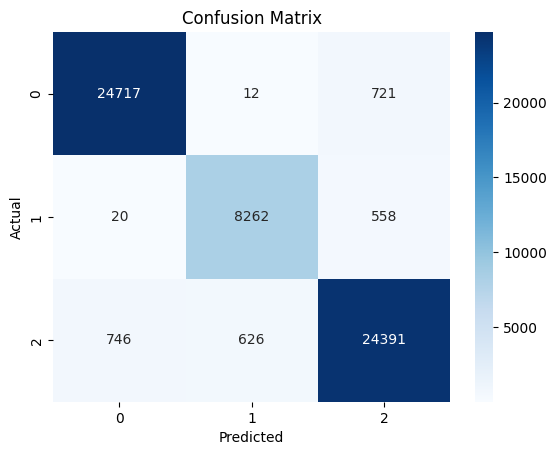

In [26]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


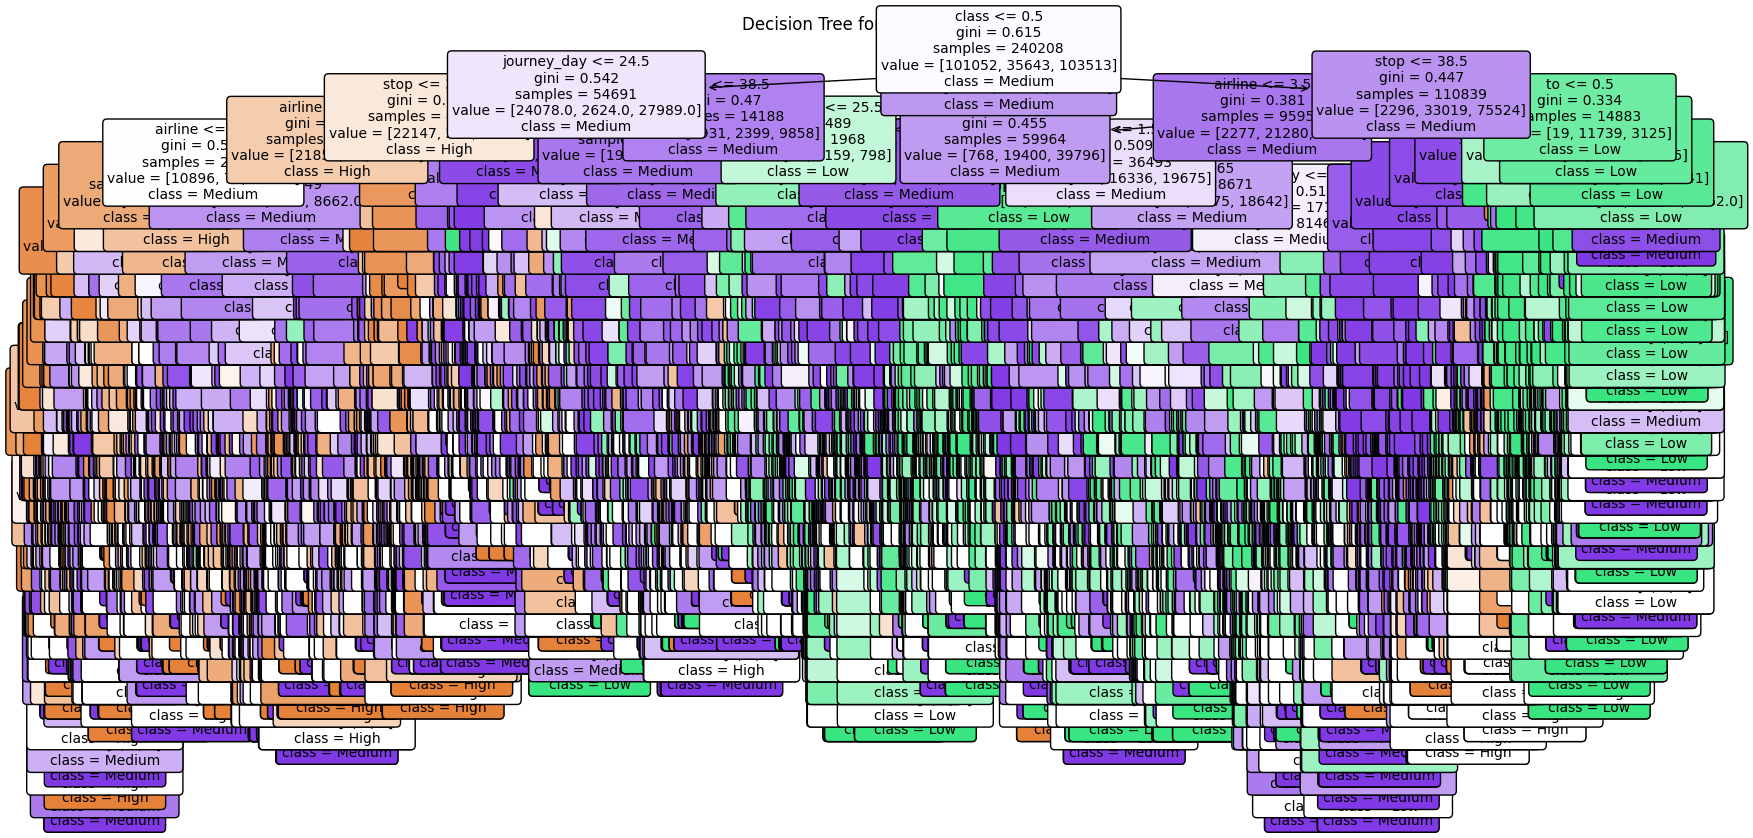

In [27]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(model,
          feature_names=X.columns,
          class_names=model.classes_,
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Decision Tree for Fare Category")
plt.show()

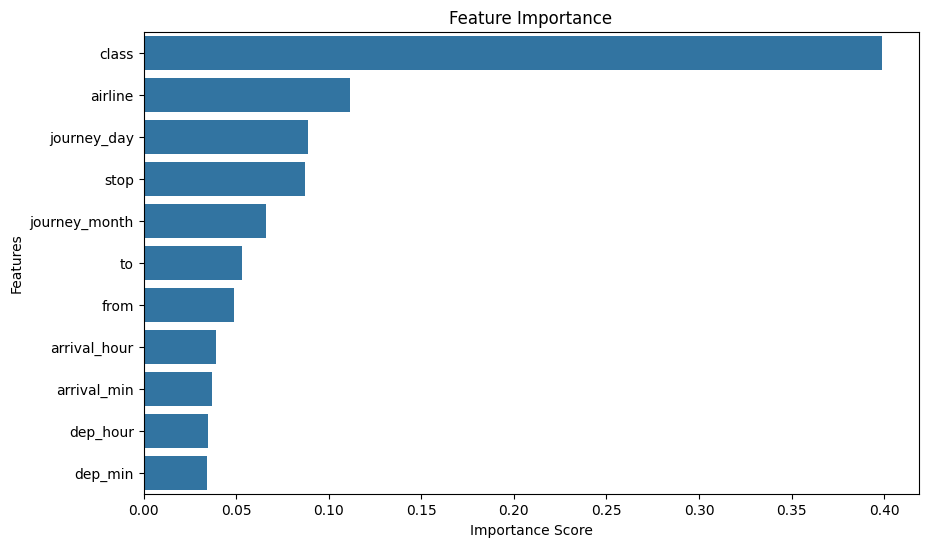

In [28]:
# Feature importance values
importances = model.feature_importances_

# Create a DataFrame for easy plotting
feat_imp_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df)
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()
